# Trabajo semanal 12:

1) Ej. 6 TP Síntesis de Cuadripolos) 

Sintetizar un cuadripolo que cumpla con los siguientes parámetros:

\begin{equation}
Y_{11}=\frac{I_1}{V_1}|_{V_2=0}=3s.\frac{(s^2+7/3)}{(s^2+2)(s^2+5)}
\end{equation}

\begin{equation}
Y_{21}=\frac{I_2}{V_1}|_{V_2=0}=\frac{s.(s^2+1)}{(s^2+2)(s^2+5)}
\end{equation}

+ a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
+ b) Calcular el valor de los componentes, es decir la síntesis analítica.

2) Dada la siguiente transferencia:

\begin{equation}
T(s)=\frac{V_2}{V_1}|_{I_2=0}=\frac{k.(s+1)}{(s+2)(s+4)}
\end{equation}

+ a) Obtener la topología circuital que respeta la transferencia solicitada, utilizando parámetros Z e Y.
+ b) Calcular el valor de los componentes y el parámetro k.



Algunas pistas:

+ Ojo con los componentes de cierre. Prestar atención a las condiciones de medición de las restricciones (parámetros, transferencias, etc)

+ Verificar la topología obtenida analizando las transferencias prescritas en sus puntos clave, es decir extremos de banda, ceros de transferencia, etc.

Bonus:

+ +20 💎 Simulación simbólica de la función transferencia (vale pedir ayuda al profe)
+ +20 🎓 Simulación circuital de la red obtenida (ya lo deberían saber hacer)
+ +5 🍺 Presentación en jupyter notebook

## Resolucion 1):
### Simulación simbólica de la función transferencia:

In [21]:
import sys
!{sys.executable} -m pip install schemdraw

La transferencia I2/I1 es:


0.142857142857143*(s**2 + 1)/(0.428571428571429*s**2 + 1.0)

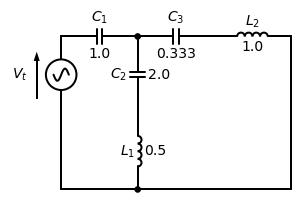

In [22]:
import schemdraw as schem
import schemdraw.elements as e
import sympy as sp

def paralelo(a, b):
    return (a*b)/(a+b)

s = sp.symbols('s', complex=True)

Y11 = (3*s*(s**2 + (7/3)))/((s**2 + 2)*(s**2 + 5))

C1 = sp.simplify(sp.expand(s/Y11)).subs(s**2, -1)

Z2 = sp.factor(sp.simplify(sp.expand((1/Y11) - (1/(C1*s)))))

K1 = sp.simplify(sp.expand(((s**2 + 1)/(s*Z2)))).subs(s**2, -1)

Y4 = sp.factor(sp.simplify(sp.expand((1/Z2) - ((K1*s)/(s**2 + 1)))))

C3 = sp.simplify(sp.expand(s/Y4)).subs(s**2, 0)

Z6 = sp.factor(sp.simplify(sp.expand((1/Y4) - (C3/s))))

L2 = sp.limit(sp.expand(Z6/s), s**2, sp.oo)

Ta = sp.Matrix([[1, 1/(s*C1)],[0, 1]])
Tb = sp.Matrix([[1, 0],[paralelo(s*K1, 1/((1/K1)*s)), 1]])
Tc = sp.Matrix([[1, 1/(s*(1/C3)) + (s*L2)],[0, 1]])

TT = Ta * Tb * Tc

verif = sp.factor(sp.simplify(sp.expand(1/TT[1,1]))) #I2/I1

print('La transferencia I2/I1 es:')
display(verif)

d = schem.Drawing(unit=2.5)
C1 = d.add(e.CAP, d='right', label='$C_1$', botlabel=f'{float(C1)}')
d.add(e.DOT)
d.push()
C2 = d.add(e.CAP, d='down', label='$C_2$', botlabel=f'{float(K1)}')
L1 = d.add(e.INDUCTOR, d='down', label='$L_1$', botlabel=f'{float(1/K1)}')
d.pop()
C3 = d.add(e.CAP, d='right', label='$C_3$', botlabel=f'{round(float(1/C3),3)}')
L2 = d.add(e.INDUCTOR, d='right', label='$L_2$', botlabel=f'{float(L2)}')
d.add(e.LINE, d='down', l=5)
d.add(e.LINE, d='left', tox=L1.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=C1.start)
d.add(e.LINE, d='up')
Vt = d.add(e.SourceSin(), xy=C1.start, toy=L1.end, lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.8, label='$V_t$')
d.draw()

### Simulación circuital de la red obtenida:

+ Singularidades de la transferencia:
    + Polo en $\omega=\sqrt[2]{\frac{7}{3}} \dashrightarrow f=\frac{\omega}{2\pi}=243mHz$
    + Cero en $\omega=1 \dashrightarrow f=\frac{\omega}{2\pi}=159mHz$
    
<img src="TS12_1.png">
<img src="TS12_1_osc.png">

## Resolucion 2):
### Simulación simbólica de la función transferencia:

La transferencia V2/V1 es:


(s + 1)/(2*(s + 2)*(s + 4))

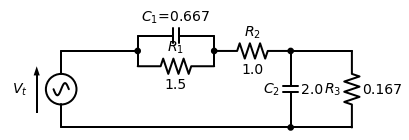

In [23]:
s = sp.symbols('s', complex=True)

Z11 = ((s+2)*(s+4))/((s+3)*(s+1))

K1 = sp.limit( Z11*(s+1), s, -1)

Z2 = sp.factor(sp.simplify(sp.expand( Z11 - (K1/(s+1) ))))

R2 = sp.limit(Z2, s, sp.oo)

Z4 = sp.factor(sp.simplify(sp.expand( Z2 - R2 )))

C2 = sp.limit(1/(Z4*s), s, sp.oo)

Y6 = sp.factor(sp.simplify(sp.expand( (1/Z4) - (C2*s) )))

R3 = 1/Y6

Ta = sp.Matrix([[1, paralelo(1/(s/K1), K1) + R2],[0, 1]])
Tb = sp.Matrix([[1, 0],[s*C2 + (1/R3) , 1]])

TT = Ta * Tb

verif = sp.factor(sp.simplify(sp.expand(1/TT[0,0]))) #V2/V1

print('La transferencia V2/V1 es:')
display(verif)

d = schem.Drawing(unit=2.5)
Linit = d.add(e.LINE, d='right')
d.add(e.DOT)
d.push()
d.add(e.LINE, d='up', l=0.5)
C1 = d.add(e.CAP, d='right', label=f'$C_1$={round(float(1/K1),3)}')
d.add(e.LINE, d='down', l=0.5)
d.pop()
d.add(e.LINE, d='down', l=0.5)
R1 = d.add(e.RES, d='right', label='$R_1$', botlabel=f'{float(K1)}')
d.add(e.LINE, d='up', l=0.5)
d.add(e.DOT)
R2 = d.add(e.RES, d='right', label='$R_2$', botlabel=f'{float(R2)}')
d.add(e.DOT)
d.push()
C2 = d.add(e.CAP, d='down', label='$C_2$', botlabel=f'{float(C2)}')
d.pop()
d.add(e.LINE, d='right', l=2)
R3 = d.add(e.RES, d='down', label='$R_3$', botlabel=f'{round(float(R3),3)}')
d.add(e.LINE, d='left', tox=C2.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Linit.start)
Vt = d.add(e.SourceSin(), xy=Linit.start, lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.8, label='$V_t$')
d.draw()

### Simulación circuital de la red obtenida:

+ Analisis de la transferencia:
    + Con $s\dashrightarrow \infty$ la transferencia presenta un cero de transmision
    + Con $s\dashrightarrow 0$ la transferencia vale $\frac{K}{8}$ de acuerdo con la parte analitica K debe valer $\frac{1}{2}$ (Esta demostrado), por lo que la ganancia de la transferencia es de en continua es de -24dB
    
<img src="TS12_2.png">
<img src="TS12_2_osc.png">